In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()
df.drop_duplicates(inplace=True)
df.shape

(5695, 2)

In [4]:
import nltk

In [5]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [6]:
from tqdm import tqdm
import re
from nltk.corpus import stopwords

def preprocessing(dataset):
    data=[]
    stopword = set(stopwords.words('english')) 
    for i in tqdm(dataset.text.values):
        temp = decontracted(i)
        temp = re.sub("\S*\d\S*", "", temp).strip()
        temp = re.sub('[^A-Za-z]+', ' ', temp)
        temp = ' '.join(e.lower() for e in temp.split() if e.lower() not in stopword)
        data.append(temp)
    return data

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
dataset = preprocessing(df)

100%|██████████| 5695/5695 [00:03<00:00, 1551.00it/s]


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
X = bow.fit_transform(dataset)
X.shape

(5695, 33545)

In [12]:
Y = df.spam

In [13]:
Y = np.array(Y)

In [14]:
X = X.toarray()

In [15]:
print(len(X))
print(len(Y))

5695
5695


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(np.array(X_train),np.array(Y_train))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
model.score(X_test,Y_test)

0.9956101843722563

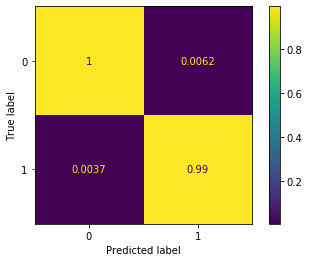

In [21]:
from sklearn.metrics import plot_confusion_matrix
confusio_matrix = plot_confusion_matrix(model, X_test, Y_test,normalize="pred")

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test,model.predict(X_test),normalize=None)

In [23]:
print(conf_mat)

[[815   2]
 [  3 319]]
